# Top Startup Statistics 2021


## Installing Required Libraries 
    1] Numpy
    2] Pandas
    3] MatplotLib
    4] Seaborn
    5] Jovian
    
  Install all the Libraries Before Starting Your Project 

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="world-startups-2021")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shrey2627/world-startups-2021" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shrey2627/world-startups-2021


'https://jovian.ai/shrey2627/world-startups-2021'

In [4]:
project_name = "World-Startups"

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Getting Dataset 
    Here I am taking dataset from Kaggle 
    https://www.kaggle.com/datasets/khaiid/startups-by-valuation

In [7]:
data_df = pd.read_csv("startups.csv")

## Reading Dataset 
    Lets go through the entire dataset
    

In [8]:
data_df

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.00,April-21,Internet,China
1,SpaceX,100.00,October-21,Aerospace,United States
2,Stripe,95.00,March-21,Financial services,United States / Ireland
3,Klarna,45.60,June-21,Fintech,Sweden
4,Canva,40.00,September-21,Graphic design,Australia
...,...,...,...,...,...
245,Bitso,2.20,May-21,Cryptocurrency,Mexico
246,Gympass,2.20,June-21,NaN,Brazil / United States
247,Kurly,2.20,July-21,E-commerce,South Korea
248,Addepar,2.17,June-21,Fintech,United States


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         250 non-null    object 
 1   Valuation       250 non-null    float64
 2   Valuation_date  250 non-null    object 
 3   Industry        233 non-null    object 
 4   Country         250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


In [10]:
data_df.columns

Index(['Company', 'Valuation', 'Valuation_date', 'Industry', 'Country'], dtype='object')

In [11]:
data_df.shape

(250, 5)

# Data Cleaning and Transforming
    Here we will perform some cleaning methods to remove Null values and change data types of columns 
    

Lets Clean Industry Column and fill the missing values.

In [12]:
data_df['Industry'].unique()

array(['Internet', 'Aerospace', 'Financial services', 'Fintech',
       'Graphic design', 'Retail', 'Software', 'Video games',
       'Cryptocurrency', 'Education technology', 'E-commerce',
       'Technology', 'Financial Technology', 'Finance', 'Health', nan,
       'Artificial intelligence', 'Batteries', 'Self-driving cars',
       'Marketplace', 'Venture capital', 'Internet media',
       'Computer software', 'Software as a service', 'Hospitality',
       'Marketing', 'Software development', 'Robotics',
       'Application security', 'Cloud security', 'Fantasy sports',
       'Logistics', 'Virtual events', 'NFT', 'Computer security',
       'Transportation', 'Travel', 'Robotic process automation',
       'Healthcare', 'Real estate technology', 'Workforce management',
       'Real estate', 'Cybersecurity', 'Collaborative software',
       'Mass media', 'Data infrastructure', 'Health technology',
       'Food delivery', 'Data governance', 'Ghost kitchen',
       'Electronic Cigarettes

In [13]:
data_df[data_df['Industry'].isna()]

,Company,Valuation,Valuation_date,Industry,Country
29,GoodLeap,12.00,October-21,NaN,United States
97,Thrasio,5.00,October-21,NaN,United States
109,Checkr,4.60,August-21,NaN,United States
134,Patreon,4.00,April-21,NaN,United States
143,VAST Data,3.70,May-21,NaN,United States
145,Shouqi,3.55,December-16,NaN,China
170,SentinelOne,3.10,November-20,NaN,United States
195,VANCL,3.00,February-14,NaN,China
198,Wefox,3.00,June-21,NaN,Germany
199,Yixia Technology,3.00,November-16,NaN,China


In [14]:
data_df['Industry'].fillna('Unknown',inplace = True)

In Valuation_date column, There is no use of having date so lets split the column into two.

In [15]:
data_df[['Valuation_month','Valuation_day']] = data_df['Valuation_date'].str.split('-', expand=True)

In [16]:
data_df['Valuation_date'].astype('string')

0          April-21
1        October-21
2          March-21
3           June-21
4      September-21
           ...     
245          May-21
246         June-21
247         July-21
248         June-21
249         June-21
Name: Valuation_date, Length: 250, dtype: string

In [17]:
data_df

,Company,Valuation,Valuation_date,Industry,Country,Valuation_month,Valuation_day
0,ByteDance,140.00,April-21,Internet,China,April,21
1,SpaceX,100.00,October-21,Aerospace,United States,October,21
2,Stripe,95.00,March-21,Financial services,United States / Ireland,March,21
3,Klarna,45.60,June-21,Fintech,Sweden,June,21
4,Canva,40.00,September-21,Graphic design,Australia,September,21
...,...,...,...,...,...,...,...
245,Bitso,2.20,May-21,Cryptocurrency,Mexico,May,21
246,Gympass,2.20,June-21,Unknown,Brazil / United States,June,21
247,Kurly,2.20,July-21,E-commerce,South Korea,July,21
248,Addepar,2.17,June-21,Fintech,United States,June,21


Now lets drop unwanted columns such as Valuation_date and Valuation_day

In [18]:
data_df.drop(['Valuation_date','Valuation_day'], axis=1, inplace = True)

In [19]:
data_df

,Company,Valuation,Industry,Country,Valuation_month
0,ByteDance,140.00,Internet,China,April
1,SpaceX,100.00,Aerospace,United States,October
2,Stripe,95.00,Financial services,United States / Ireland,March
3,Klarna,45.60,Fintech,Sweden,June
4,Canva,40.00,Graphic design,Australia,September
...,...,...,...,...,...
245,Bitso,2.20,Cryptocurrency,Mexico,May
246,Gympass,2.20,Unknown,Brazil / United States,June
247,Kurly,2.20,E-commerce,South Korea,July
248,Addepar,2.17,Fintech,United States,June


In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          250 non-null    object 
 1   Valuation        250 non-null    float64
 2   Industry         250 non-null    object 
 3   Country          250 non-null    object 
 4   Valuation_month  250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


In [21]:
data_df['Valuation_month'].unique()

array(['April', 'October', 'March', 'June', 'September', 'August', 'July',
       'January', 'November', 'May', 'February', 'December'], dtype=object)

In [22]:
data_df['Country'] = data_df['Country'].astype('string')

In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          250 non-null    object 
 1   Valuation        250 non-null    float64
 2   Industry         250 non-null    object 
 3   Country          250 non-null    string 
 4   Valuation_month  250 non-null    object 
dtypes: float64(1), object(3), string(1)
memory usage: 9.9+ KB


In [24]:
data_df = data_df.set_index(['Company','Valuation','Industry','Valuation_month']).apply(lambda x:x.str.split('/').explode()).reset_index()

In [25]:
data_df

,Company,Valuation,Industry,Valuation_month,Country
0,ByteDance,140.00,Internet,April,China
1,SpaceX,100.00,Aerospace,October,United States
2,Stripe,95.00,Financial services,March,United States
3,Stripe,95.00,Financial services,March,Ireland
4,Klarna,45.60,Fintech,June,Sweden
...,...,...,...,...,...
264,Gympass,2.20,Unknown,June,Brazil
265,Gympass,2.20,Unknown,June,United States
266,Kurly,2.20,E-commerce,July,South Korea
267,Addepar,2.17,Fintech,June,United States


In [26]:
data_df.Country = data_df.Country.apply(lambda x:x.replace(' ',''))

In [38]:
data_df.Country = data_df.Country.str.lstrip()

In [39]:
data_df

,Company,Valuation,Industry,Valuation_month,Country
0,ByteDance,140.00,Internet,April,China
1,SpaceX,100.00,Aerospace,October,UnitedStates
2,Stripe,95.00,Financial services,March,UnitedStates
3,Stripe,95.00,Financial services,March,Ireland
4,Klarna,45.60,Fintech,June,Sweden
...,...,...,...,...,...
264,Gympass,2.20,Unknown,June,Brazil
265,Gympass,2.20,Unknown,June,UnitedStates
266,Kurly,2.20,E-commerce,July,SouthKorea
267,Addepar,2.17,Fintech,June,UnitedStates


All other column looks good, So we will move over to the Visualization part of Data analysis.

# Data Visualization 
    Now Lets get some visuals from our Cleaned Dataset Using Python libraries like Seaborn and Matplotlib

In [28]:
data_df

,Company,Valuation,Industry,Valuation_month,Country
0,ByteDance,140.00,Internet,April,China
1,SpaceX,100.00,Aerospace,October,UnitedStates
2,Stripe,95.00,Financial services,March,UnitedStates
3,Stripe,95.00,Financial services,March,Ireland
4,Klarna,45.60,Fintech,June,Sweden
...,...,...,...,...,...
264,Gympass,2.20,Unknown,June,Brazil
265,Gympass,2.20,Unknown,June,UnitedStates
266,Kurly,2.20,E-commerce,July,SouthKorea
267,Addepar,2.17,Fintech,June,UnitedStates


In [29]:
top_industry = data_df.groupby('Industry').sum().sort_values(by = 'Valuation',ascending = False).head(10)

In [30]:
top_industry

,Valuation
Industry,
Financial services,276.80
Internet,203.00
Fintech,180.97
Software,169.86
E-commerce,125.74
Aerospace,104.20
Artificial intelligence,82.43
Cryptocurrency,73.50
Unknown,63.93


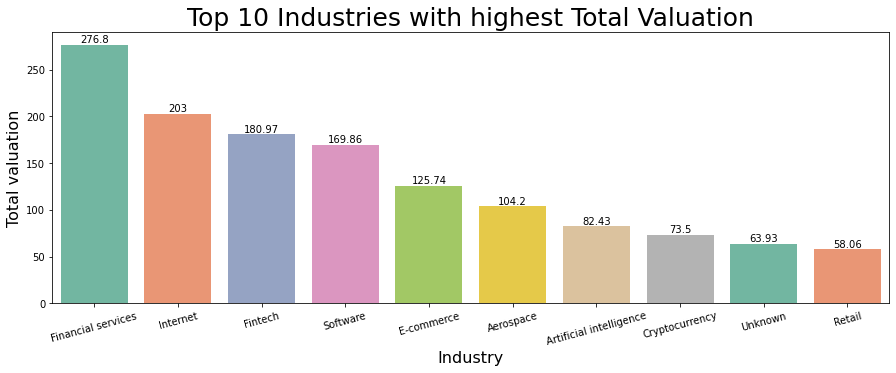

In [31]:
plt.figure(figsize=(15,5))
fig = sns.barplot(x = top_industry.index, y = top_industry.Valuation, data = top_industry, palette ='Set2')
fig.set_xlabel('Industry',fontsize=16)
fig.set_ylabel('Total valuation',fontsize=16)
fig.set_xticklabels(fig.get_xticklabels(),rotation = 15,fontsize = 10)
fig.set_title('Top 10 Industries with highest Total Valuation',fontsize = 25)
fig.bar_label(fig.containers[0])
plt.show()

In [32]:
month_count = data_df['Valuation_month'].value_counts()

In [33]:
month_count

June         38
August       36
October      30
November     27
September    25
July         23
May          22
April        15
March        15
January      15
December     13
February     10
Name: Valuation_month, dtype: int64

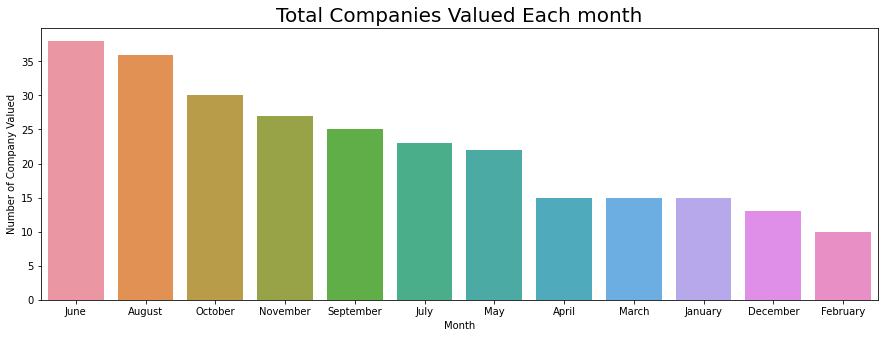

In [34]:
plt.figure(figsize=(15,5))
fig1 = sns.barplot(month_count.index,month_count)
fig1.set_xlabel('Month',fontsize = 10)
fig1.set_ylabel('Number of Company Valued', fontsize = 10)
fig1.set_title('Total Companies Valued Each month', fontsize = 20)
plt.show()

In [85]:
country_count = data_df['Country'].value_counts().head(15)

In [86]:
country_count

UnitedStates     128
China             27
India             27
UnitedKingdom     11
Germany            6
Canada             6
SouthKorea         6
France             5
Israel             4
China              3
Indonesia          3
Israel             3
Brazil             3
Belgium            2
Netherlands        2
Name: Country, dtype: int64

In [87]:
data_df

,Company,Valuation,Industry,Valuation_month,Country
0,ByteDance,140.00,Internet,April,China
1,SpaceX,100.00,Aerospace,October,UnitedStates
2,Stripe,95.00,Financial services,March,UnitedStates
3,Stripe,95.00,Financial services,March,Ireland
4,Klarna,45.60,Fintech,June,Sweden
...,...,...,...,...,...
264,Gympass,2.20,Unknown,June,Brazil
265,Gympass,2.20,Unknown,June,UnitedStates
266,Kurly,2.20,E-commerce,July,SouthKorea
267,Addepar,2.17,Fintech,June,UnitedStates


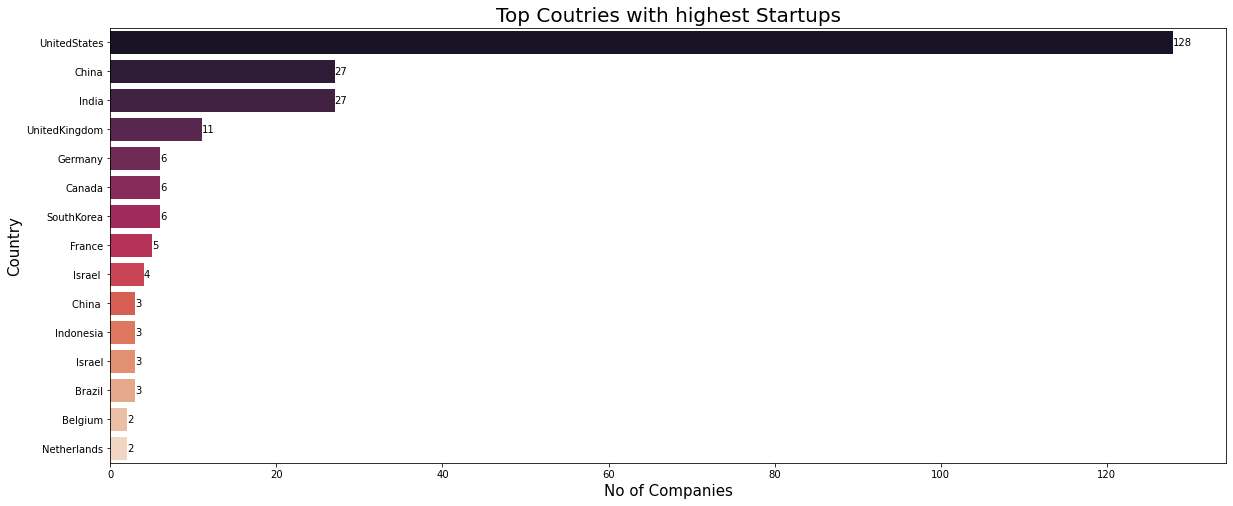

In [98]:
plt.figure(figsize=(20,8))
fig2 = sns.barplot(country_count,country_count.index,palette = 'rocket')
fig2.set_xlabel('No of Companies',fontsize = 15)
fig2.set_ylabel('Country', fontsize = 15)
fig2.set_title('Top Coutries with highest Startups', fontsize = 20)
fig2.bar_label(fig2.containers[0])
plt.show()

# Question and Answers 

First Lets Create a Copy of our Dataset in order to perform operations to answer below mentioned questions. Doing this will not harm our actual dataset.

In [44]:
data_df_copy = data_df.copy()

In [45]:
data_df_copy.set_index('Company', inplace = True)

In [46]:
data_df_copy

,Valuation,Industry,Valuation_month,Country
Company,,,,
ByteDance,140.00,Internet,April,China
SpaceX,100.00,Aerospace,October,UnitedStates
Stripe,95.00,Financial services,March,UnitedStates
Stripe,95.00,Financial services,March,Ireland
Klarna,45.60,Fintech,June,Sweden
...,...,...,...,...
Gympass,2.20,Unknown,June,Brazil
Gympass,2.20,Unknown,June,UnitedStates
Kurly,2.20,E-commerce,July,SouthKorea


### Question 1] Which are the top 10 Companies with highest Valuation?

In [47]:
high = data_df_copy['Valuation'].sort_values(ascending = False).head(10)

In [48]:
high

Company
ByteDance     140.0
SpaceX        100.0
Stripe         95.0
Stripe         95.0
Klarna         45.6
Canva          40.0
Instacart      39.0
Databricks     38.0
Revolut        33.0
Nubank         30.0
Name: Valuation, dtype: float64

### Question 2] In March Which Company has the highest Valuation?

In [49]:
mar_df = data_df_copy.loc[data_df_copy['Valuation_month'] == 'March'].head(1)

In [50]:
mar_df

,Valuation,Industry,Valuation_month,Country
Company,,,,
Stripe,95.0,Financial services,March,UnitedStates


### Question 3] Get the list of Indian companies and check which one has the highest Valuation?

In [51]:
indian_df = data_df_copy.loc[data_df_copy['Country'] == 'India']

In [52]:
indian_df

,Valuation,Industry,Valuation_month,Country
Company,,,,
Byju's,21.0,Education technology,November,India
Oyo,9.6,Hospitality,August,India
Dream11,8.0,Fantasy sports,November,India
Razorpay,7.5,Fintech,December,India
Ola Cabs,7.3,Transportation,December,India
PharmEasy,5.6,Health technology,October,India
PhonePe,5.5,Fintech,December,India
Swiggy,5.5,Food delivery,July,India
Meesho,4.9,E-commerce,September,India


In [53]:
indian_df.head(1)

,Valuation,Industry,Valuation_month,Country
Company,,,,
Byju's,21.0,Education technology,November,India


### Question 4] In China how many startups are from E-commerce?

In [55]:
china_df = data_df_copy.loc[data_df_copy['Country']=='China'] 

In [56]:
china_df

,Valuation,Industry,Valuation_month,Country
Company,,,,
ByteDance,140.00,Internet,April,China
Xiaohongshu,20.00,E-commerce,October,China
Yuanfudao,15.50,Education technology,October,China
DJI,15.00,Technology,September,China
Shein,15.00,E-commerce,February,China
Bitmain,12.00,Cryptocurrency,June,China
ZongMu Technology,11.00,Self-driving cars,June,China
Chehaoduo,10.00,Marketplace,July,China
Lalamove,10.00,Technology,January,China


In [57]:
china_ecom = china_df.loc[china_df['Industry']=='E-commerce']

In [58]:
china_ecom

,Valuation,Industry,Valuation_month,Country
Company,,,,
Xiaohongshu,20.0,E-commerce,October,China
Shein,15.0,E-commerce,February,China


This is how we can answer lots of questions from any Dataset once it is cleaned and transformed.

In [99]:
!pip install jovian --upgrade --quiet

In [100]:
import jovian

In [101]:
jovian.commit(outputs=['startups.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shrey2627/world-startups" on https://jovian.ai
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/shrey2627/world-startups


'https://jovian.ai/shrey2627/world-startups'

In [102]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "shrey2627/world-startups" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/shrey2627/world-startups


'https://jovian.ai/shrey2627/world-startups'